In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Meliance_new_dataset.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,North South Delhi,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,01-05-2019,13:08:00,Ewallet,470.547,14.285714,78.4245,9.1
1,226-31-3081,C,West Delhi,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,03-08-2019,10:29:00,Cash,68.760,14.285714,11.4600,9.6
2,631-41-3108,A,North South Delhi,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,03-03-2019,13:23:00,Credit card,291.879,14.285714,48.6465,7.4
3,123-19-1176,A,North South Delhi,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33:00,Ewallet,419.184,14.285714,69.8640,8.4
4,373-73-7910,A,North South Delhi,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,02-08-2019,10:37:00,Ewallet,543.753,14.285714,90.6255,5.3


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764536,5.501496,15.400368,323.407726,277.206622,1.428571e+01,46.338016,6.972682
std,26.417403,2.895338,11.715192,246.019028,210.873453,2.061602e-13,34.634089,1.717647
min,10.080000,1.000000,0.508500,10.678500,9.153000,1.428571e+01,1.525500,4.000000
25%,33.235000,3.000000,5.894750,123.789750,106.105500,1.428571e+01,18.317250,5.500000
50%,55.610000,5.500000,12.096000,254.016000,217.728000,1.428571e+01,38.004000,7.000000
75%,77.940000,8.000000,22.539500,473.329500,405.711000,1.428571e+01,67.084500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,893.700000,1.428571e+01,148.950000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1003 non-null   object 
 1   Branch                   1003 non-null   object 
 2   City                     1003 non-null   object 
 3   Customer type            1003 non-null   object 
 4   Gender                   1003 non-null   object 
 5   Product line             1003 non-null   object 
 6   Unit price               1003 non-null   float64
 7   Quantity                 1003 non-null   float64
 8   Tax 5%                   1003 non-null   float64
 9   Total                    1003 non-null   float64
 10  Date                     1003 non-null   object 
 11  Time                     1003 non-null   object 
 12  Payment                  1003 non-null   object 
 13  cogs                     1003 non-null   float64
 14  gross margin percentage 

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# EDA

In [ ]:
def how_many_in_cat_print(df, variable):
    print(df.groupby(variable)[variable].count())  
    print()

In [ ]:
import matplotlib.pyplot as plt

def how_many_in_cat_plot(df, variable, color, a, i):
    ax = plt.subplot(3, 3, (i+1))
    ax.tick_params(labelrotation=15)
    #df[variable].hist(ax = ax)
    plt.hist(df[variable], facecolor = color, alpha=a)
    plt.title(variable)

In [ ]:
for i, feature in enumerate(['Branch', 'City', 'Customer type', 'Gender','Product line','Quantity', 'Payment', 'gross margin percentage']):
    how_many_in_cat_print(df, feature)

Branch
A    342
B    333
C    328
Name: Branch, dtype: int64

City
North South Delhi    342
South Delhi          333
West Delhi           328
Name: City, dtype: int64

Customer type
Member    502
Normal    501
Name: Customer type, dtype: int64

Gender
Female    502
Male      501
Name: Gender, dtype: int64

Product line
Electronic accessories    172
Fashion accessories       179
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Product line, dtype: int64

Quantity
1.0     111
2.0      89
3.0      89
4.0     108
5.0     100
5.5      20
6.0      96
7.0     100
8.0      82
9.0      92
10.0    116
Name: Quantity, dtype: int64

Payment
Cash           346
Credit card    311
Ewallet        346
Name: Payment, dtype: int64

gross margin percentage
14.285714    1003
Name: gross margin percentage, dtype: int64



Text(0.5, 1.0, 'Customer Type by Branch')

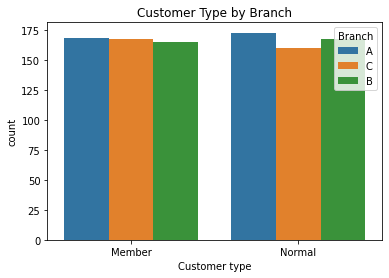

In [ ]:
 sns.countplot(x="Customer type", hue = "Branch", data =df).set_title("Customer Type by Branch")

Text(0.5, 1.0, 'Payment Mode')

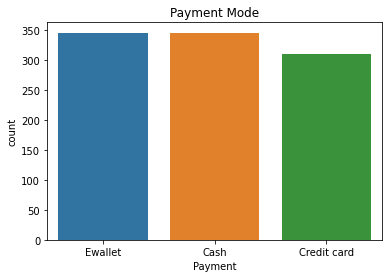

In [ ]:
 sns.countplot(x="Payment", data =df).set_title("Payment Mode")

Text(0.5, 1.0, 'Payment Channel by Branch')

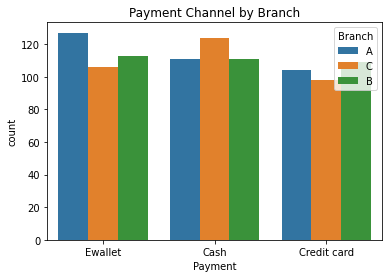

In [ ]:
sns.countplot(x="Payment", hue = "Branch", data =df).set_title("Payment Channel by Branch")

# Problem 1
According to Market Research by Meliance superstore it is suggested if a
company gives Discount vouchers worth ₹150 for sales more than ₹600,
the company will experience a rise of 10% in its sales. Is this alternative
cost-effective? Support your answer with valid justification.

In [ ]:
sales = df['Total'].sum()

In [ ]:
increse_in_sales= df['Total'].sum()*1.10

In [ ]:
cutomers_with_voucher = df[df['Total']>600]['Total'].count()

In [ ]:
price_of_the_voucher = 150

In [ ]:
round(increse_in_sales - sales)

32438

In [ ]:
cutomers_with_voucher * 150

24300

**Cost of vouchers < increase in sales. So this alternative will be cost effective**

# Problem 2 
It is believed that customers coming in during peak hours give a lower satisfaction rating than those coming in during the non-peak hours. Analyse the data to find out if this assumption is true or not. Further, present the results to the Stakeholders in an interpretable format and make suggestions to increase employee productivity during peak hours.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['weekday'] = df['Date'].dt.day_name()
df['weekday'].unique()

array(['Saturday', 'Friday', 'Sunday', 'Monday', 'Thursday', 'Wednesday',
       'Tuesday'], dtype=object)

In [ ]:
df['month_name'] = df['Date'].dt.month_name()
df['month_name'].unique()

array(['January', 'March', 'February'], dtype=object)

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


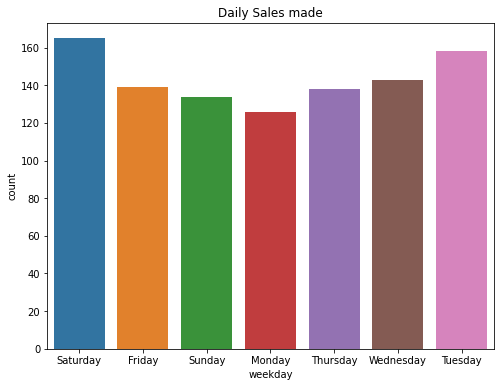

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Daily Sales made')
sns.countplot(df['weekday'])

In [ ]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype == "object"]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment',
 'weekday',
 'month_name']

In [ ]:
print("A detailed description of the dataset ")
d = df.describe().T
d

A detailed description of the dataset 


,count,mean,std,min,25%,50%,75%,max
Unit price,1003.0,55.764536,2.641740e+01,10.080000,33.235000,55.610000,77.940000,99.960000
Quantity,1003.0,5.501496,2.895338e+00,1.000000,3.000000,5.500000,8.000000,10.000000
Tax 5%,1003.0,15.400368,1.171519e+01,0.508500,5.894750,12.096000,22.539500,49.650000
Total,1003.0,323.407726,2.460190e+02,10.678500,123.789750,254.016000,473.329500,1042.650000
cogs,1003.0,277.206622,2.108735e+02,9.153000,106.105500,217.728000,405.711000,893.700000
gross margin percentage,1003.0,14.285714,2.061602e-13,14.285714,14.285714,14.285714,14.285714,14.285714
gross income,1003.0,46.338016,3.463409e+01,1.525500,18.317250,38.004000,67.084500,148.950000
Rating,1003.0,6.972682,1.717647e+00,4.000000,5.500000,7.000000,8.500000,10.000000
Hour,1003.0,14.913260,3.186714e+00,10.000000,12.000000,15.000000,18.000000,20.000000


Text(0.5, 1.0, 'Product Sales per Hour')

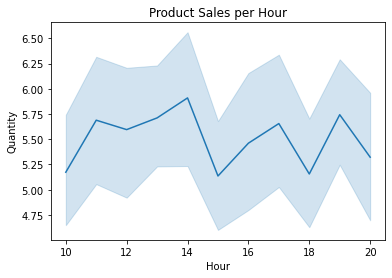

In [ ]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")


**Peak was achieved during the 14th hour of the day, So more quantity is been sold in Afternoon**

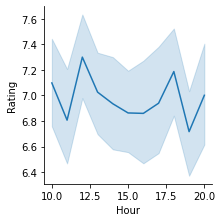

In [ ]:
sns.relplot(x = 'Hour', y = 'Rating',data = df, kind = 'line',  height = 3)

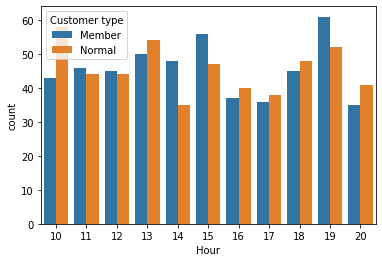

In [ ]:
# Members' visit hour
sns.countplot(x = 'Hour', hue = 'Customer type', data = df)

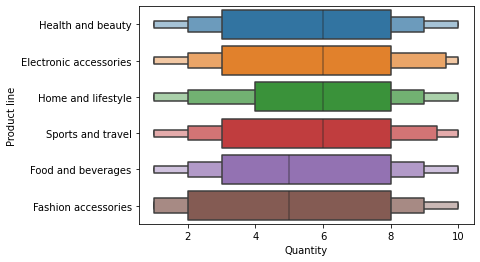

In [ ]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )

Food and beverages, fashion accessories has less mean quantity whereas we have seen that both of these categories had high rating. So we need to increase our supply.

# Problem 3
The gender diversity among customers has always been an interesting aspect for the Stakeholders and they are planning to launch a promotional campaign as part of the upcoming "Women's Day" celebrations. Use Visualization tools to determine the ratio of sales for each Product Category among the given genders. Also, suggest which Product Category should be put on Sale as part of the campaign.

In [ ]:
print(df.shape)
df['Gender'].value_counts()

(1003, 20)


Female    502
Male      501
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


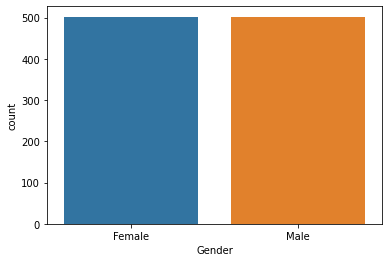

In [ ]:
sns.countplot('Gender' , data = df)

Creating dummies for Gender column for getting numeric data for seaborn bar plot

In [ ]:
gender_dummies  = pd.get_dummies(df['Gender'])
gender_dummies.head()

,Female,Male
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


Joining original data frame (df) with gender dummies data frame (gender_dummies)

In [ ]:
df = pd.concat([df, gender_dummies], axis = 1)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday,month_name,Hour,Female,Male
0,750-67-8428,A,North South Delhi,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05,2021-02-26 13:08:00,Ewallet,470.547,14.285714,78.4245,9.1,Saturday,January,13,1,0
1,226-31-3081,C,West Delhi,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-03-08,2021-02-26 10:29:00,Cash,68.760,14.285714,11.4600,9.6,Friday,March,10,1,0
2,631-41-3108,A,North South Delhi,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03,2021-02-26 13:23:00,Credit card,291.879,14.285714,48.6465,7.4,Sunday,March,13,0,1
3,123-19-1176,A,North South Delhi,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27,2021-02-26 20:33:00,Ewallet,419.184,14.285714,69.8640,8.4,Sunday,January,20,0,1
4,373-73-7910,A,North South Delhi,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-02-08,2021-02-26 10:37:00,Ewallet,543.753,14.285714,90.6255,5.3,Friday,February,10,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


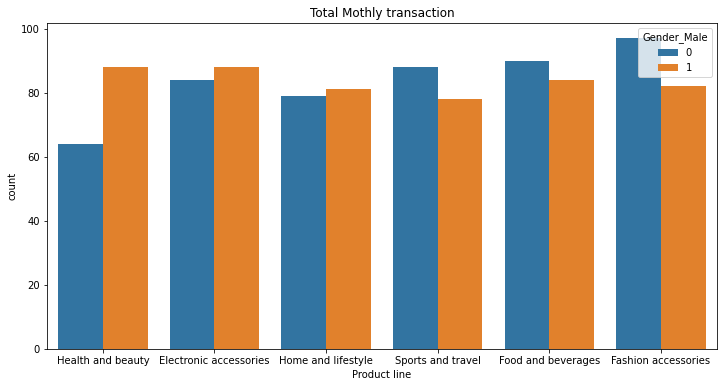

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Total Mothly transaction')
sns.countplot(dfs['Product line'], hue = dfs.Gender_Male)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


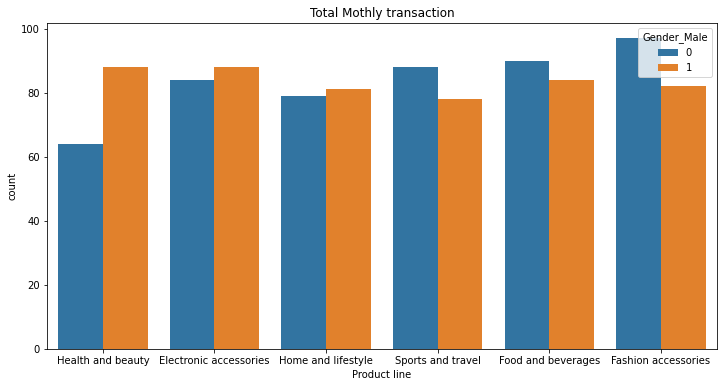

In [ ]:
cat_feats = ['Gender']
dfs = pd.get_dummies(df, columns=cat_feats, drop_first=True)
plt.figure(figsize=(12, 6))
plt.title('Total Mothly transaction')
sns.countplot(dfs['Product line'], hue = dfs.Gender_Male)

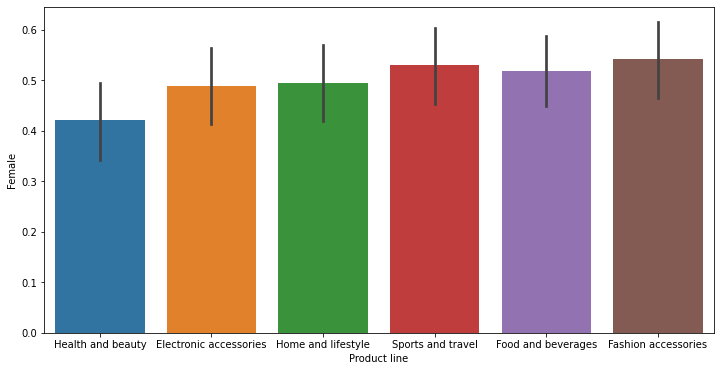

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Female', data = df)

**Max Average Sales of Fashion Accessories is from Females**


# Problem 4 
Meliance superstore is planning to open a new store in East Delhi.
Through present customer data, find out the product category/s which
would be best suited for the new store.

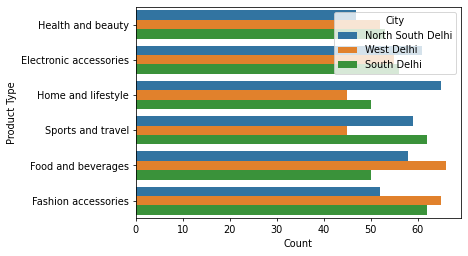

In [ ]:
plt.figure(dpi=70)
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

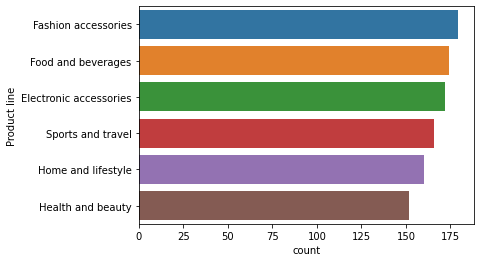

In [ ]:
sns.countplot(y = 'Product line', data=df, order = df['Product line'].value_counts().index )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


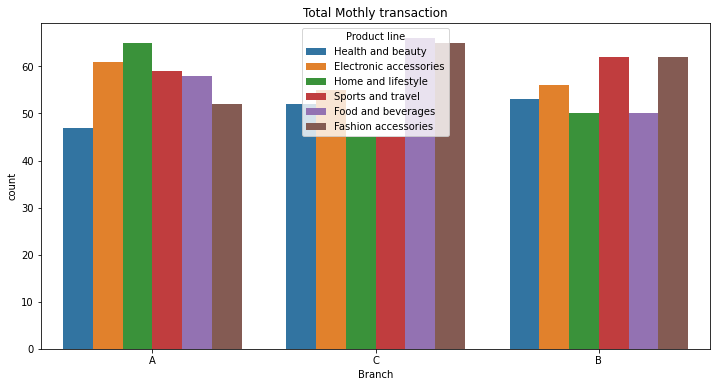

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Total Mothly transaction')
sns.countplot(df['Branch'], hue = df['Product line'])

From the above visualisation, Most customers purchase Home and Lifestyle products from branch A than C, Fashion accessories has most customers in branches C and B than in A and finally Sports and travel has most customers in branch B than in the rest. By this, We deduce that instead of commodities taking longer in the store they can be transfered to branches where their demand is high, e.g Part of Home and Lifestyle products can be taken to branch A to C because there are approximately 5 customers in Branch A for every single customer in brach C for the same commodity.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


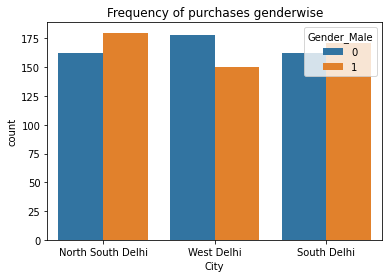

In [ ]:
#plt.figure(figsize=(12, 6))
plt.title('Frequency of purchases genderwise')
sns.countplot(df['City'], hue=dfs['Gender_Male'])

In Branch A(North South Delhi), the active purchase gender is Male and in B(West Delhi City) its Female

In [ ]:
df['Product line'].value_counts(ascending = True)


Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Electronic accessories    172
Food and beverages        174
Fashion accessories       179
Name: Product line, dtype: int64

Text(0.5, 1.0, 'Product line per Quantity')

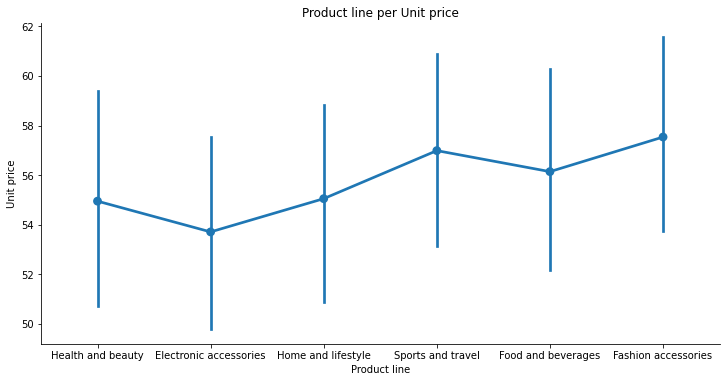

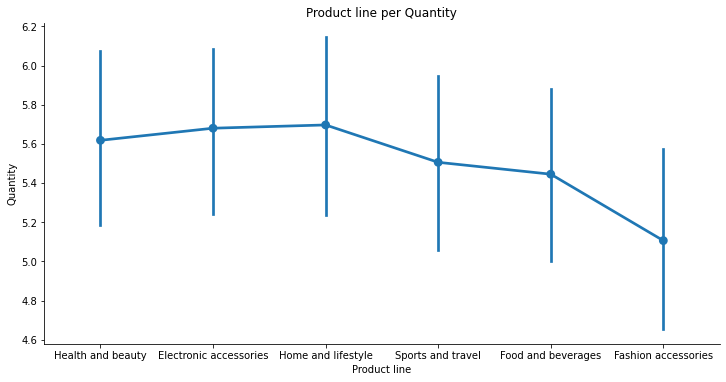

In [ ]:
sns.catplot(x='Product line',y='Unit price',kind='point',data=df,aspect=2)
plt.title('Product line per Unit price')
sns.catplot(x='Product line',y='Quantity',kind='point',data=df,aspect=2)
plt.title('Product line per Quantity')

Electronic accessoires has the low Unit price, on the other hand it has the high quantity of products purchased by customer => Customers want to buy the cheap products like Electronic accessoires , Health & Beaty and Home & Lifestyle.

**Fashion accessories , food and beverages and Electronic accessories will be most suitable for the new store**

Name- Mahak Mahajan

College- Shaheed Rajguru College of Applied Sciences

Contact Number- 8285668995
